In [1]:
import sys
sys.path.append("./utils/") # Adds higher directory to python modules path.
import random
import numpy as np
import glob, os
import json
import pandas as pd
import cv2
from NeMO_3dApputils import Coral3DData, CoralImageList

from matplotlib import colors
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
%matplotlib notebook

Using TensorFlow backend.


In [2]:
classify_masterfile = "/home/rechant/Documents/NeMO-Net/NeMO-NET/Images/AppData_May/NeMO-MayCSVs/ClassificationAttempts_May_Master.csv"
img_path = "/home/rechant/Documents/NeMO-Net/NeMO-NET/Images/AppData_May"
NeMO_Data = Coral3DData(classify_masterfile, img_path = img_path, meshType = ["3D"])
NeMO_Data.load_satellite_transect_data()
print(NeMO_Data.unique_transects)

Total number of lines in /home/rechant/Documents/NeMO-Net/NeMO-NET/Images/AppData_May/NeMO-MayCSVs/ClassificationAttempts_May_Master.csv is: 54404
Will attempt to load only ['3D'] data
Will attempt to load all relevant files...
['guam transect 2 1_4' 'guam transect 2019_05_13_01 4_3'
 'guam transect 2 4_3' 'guam transect 2 2_5'
 'puertoRico transect 2019_03_12_01 2_2' 'guam transect 2 3_3'
 'guam transect 2019_05_09_02 3_2' 'guam transect 2019_05_09_02 3_5'
 'PR_Siderastreidae' 'guam transect 2019_05_09_04 1_2'
 'guam transect 2019_05_09_02 1_2' 'guam transect 1 3_1'
 'guam transect 1 4_2' 'puertoRico transect 2019_03_12_01 3_4'
 'KAH_SIO_S05_4_2' 'KAH_SIO_S05_7_6'
 'puertoRico transect 2019_03_14_01 5_4' 'guam transect 2019_05_13_01 1_4'
 'guam transect 2019_05_09_01 5_2' 'puertoRico transect 2019_03_14_03 4_4'
 'guam transect 2019_05_09_04 1_4' 'guam transect 2019_05_09_01 4_2'
 'guam transect 1 5_4' 'guam transect 2019_05_09_04 2_4'
 'guam transect 2019_05_13_01 3_5' 'samoa_2013_cro

In [4]:
sub_userdf, user_pd_vals = NeMO_Data.filter_by_user(transect_num=20, user_rating=0.5) # only find users with more than 20 transect classifications
# sub_userdf = NeMO_Data.filter_by_rating(input_pd = user_pd, rating_range=[1,2], include_nan = False)

CIL = CoralImageList()
for i in range(len(sub_userdf)):
    classification_fileID = sub_userdf.iloc[i]['Classification_fileID']
    transect_fileID = sub_userdf.iloc[i]['Transect_fileID']
    try:
        coralimage = NeMO_Data.load_classification(classification_fileID = classification_fileID)
        CIL.append(coralimage)
        print(str(i+1) + "/" + str(len(sub_userdf)) + " " + classification_fileID + " loaded, corresponding to " + transect_fileID, end='\r')
    except FileNotFoundError:
        print(str(i+1) + "/" + str(len(sub_userdf)) + " " + "Skipping " + classification_fileID + ", corresponding to " + transect_fileID + "!", end='\r')

CIL.output_training(directory = "/home/rechant/Documents/NeMO-Net/NeMO-NET/Images/AppData_Training", add_to_dir = False)


[ 225  249  499  536  640  675  756  856  928 1087 1484 1504 1576 1591
 1599 1710 1963 2092 2132 2525 2749 2914 2975 3068 3097 3133 3237 3572
 3712 4257 4281 4295 4599 4884 5062 5247 5302 5458 5479 5565 5585 5836
 5907 6017 6154 6242 6526 6561 6605 6657 6962 7379 7744 8065 8242 8251
 8683]
Transect File for samoa_2013_cropped_6_1 not found! corresponding to guam transect 2019_05_13_01 4_301 4_4
Transect File for samoa_2013_cropped_6_2 not found! corresponding to guam transect 2019_05_09_01 1_2
Transect File for samoa_2013_cropped_1_1 not found! corresponding to puertoRico transect 2019_03_12_01 2_2
Transect File for samoa_2013_cropped_3_3 not found! corresponding to guam transect 2019_05_13_01 3_103 2_5
Transect File for samoa_2013_cropped_3_4 not found!F, corresponding to samoa_2013_cropped_3_3!
Transect File for samoa_2013_cropped_2_3 not found! corresponding to guam transect 2019_05_13_01 4_3
Transect File for samoa_2013_cropped_1_2 not found!1, corresponding to samoa_2013_cropped_2

Transect File for samoa_2013_cropped_1_4 not found!, corresponding to guam transect 2019_05_09_03 2_501 2_2
Transect File for samoa_2013_cropped_5_4 not found!, corresponding to KAH_SIO_S05_7_6 3_5d_1_4!
Transect File for samoa_2013_cropped_6_3 not found!5B, corresponding to samoa_2013_cropped_5_4!
Classification file not found at /home/rechant/Documents/NeMO-Net/NeMO-NET/Images/AppData_May/projections/guam transect 1 2_4/proj_6E23F42B-792B-4FA7-946C-A50176E503B0.png!
Classification file not found at /home/rechant/Documents/NeMO-Net/NeMO-NET/Images/AppData_May/projections/guam transect 2019_05_09_04 4_4/proj_65B9683F-E657-4430-8993-1E14D9740F7A.png!
Transect File for samoa_2013_cropped_2_4 not found!, corresponding to puertoRico transect 2019_03_12_01 1_2
Classification file not found at /home/rechant/Documents/NeMO-Net/NeMO-NET/Images/AppData_May/projections/guam transect 2019_05_13_01 4_3/proj_56274EE7-2DC1-46FA-B02A-572ADF85A650.png!
Transect File for samoa_2013_cropped_1_1 not foun

IsADirectoryError: [Errno 21] Is a directory: '/home/rechant/Documents/NeMO-Net/NeMO-NET/Images/AppData_Training/TrainImages/No Data'

File not found at /home/rechant/Documents/NeMO-Net/NeMO-NET/Images/AppData/projections/guam transect 2 1_4/proj_5196FA63-C4E7-4481-9C7D-00DFC983F9D3.png!


<IPython.core.display.Javascript object>


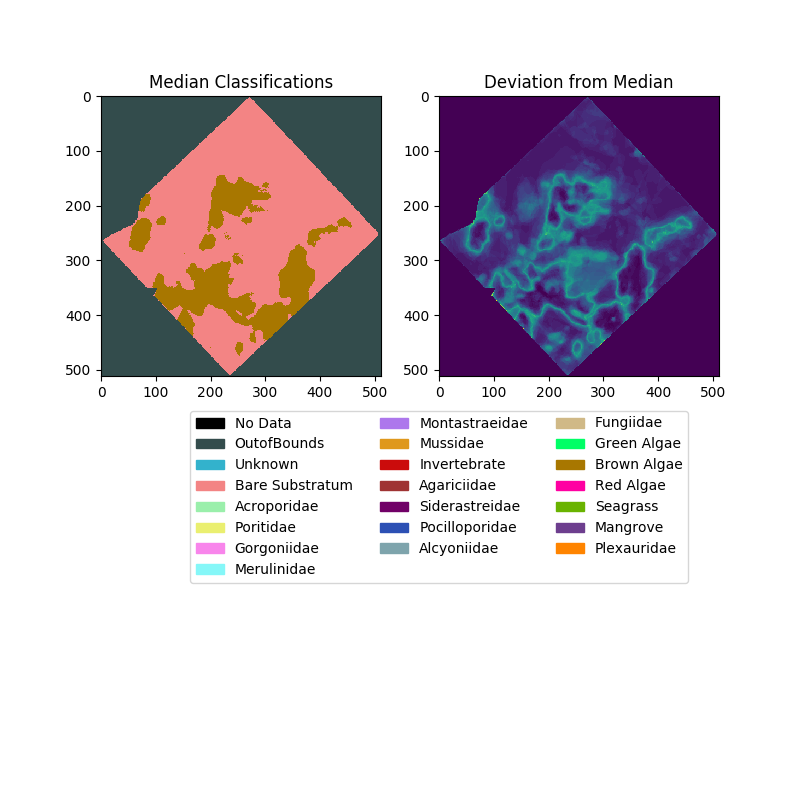

In [10]:
rating_df = NeMO_Data.filter_by_rating(transect_df, rating_range=[1,2], include_nan = False)
img_class_median, img_median_dev = NeMO_Data.median_stack_img(rating_df)

fig = plt.figure(figsize=(8,8))
ax = plt.subplot(2,2,1)
ax.imshow(img_class_median.astype(int), interpolation='nearest', cmap=NeMO_Data.cmap, norm=NeMO_Data.norm)
ax.set_title("Median Classifications")

ax = plt.subplot(2,2,2)
ax.imshow(img_median_dev)
ax.set_title("Deviation from Median")
ax.legend([mpatches.Patch(color=NeMO_Data.cmap(i)) for i in range(len(NeMO_Data.cmap.colors))],
           ['{}'.format(list(NeMO_Data.coralcolors_dict.keys())[i]) for i in range(len(NeMO_Data.coralcolors_dict))],
          loc='upper center', bbox_to_anchor=(0.0,-0.1), ncol=3)

plt.show()

b4991fb6-8216-11ea-965c-02d709759666 nan
9a7d2c06-84d0-11ea-965c-02d709759666 rangerkaren@comcast.net
8f5c0e1a-83d5-11ea-965c-02d709759666 nan
c00f4c8b-8143-11ea-965c-02d709759666 thecosmictrickster@outlook.com
3b27f082-7b3f-11ea-965c-02d709759666 nan
11655b65-8576-11ea-965c-02d709759666 nan
4fe0d216-8180-11ea-965c-02d709759666 mageem771@gmail.com
9ad95772-8e30-11ea-965c-02d709759666 nan
170a6ca8-7a87-11ea-965c-02d709759666 mizuiro22@mail.ru
ba4b3487-84f6-11ea-965c-02d709759666 mdparnell13@gmail.com
574f6ae2-818b-11ea-965c-02d709759666 laneypound@gmail.com
065e5c92-7a8c-11ea-965c-02d709759666 nan
b947503f-87e7-11ea-965c-02d709759666 nan
088411ac-7e62-11ea-965c-02d709759666 nan
3c9cce8f-7b51-11ea-965c-02d709759666 nan
10f8d9a1-7b8c-11ea-965c-02d709759666 nan
ca3008b8-83c1-11ea-965c-02d709759666 nan
26ade08d-84d7-11ea-965c-02d709759666 nan
231de9f4-8511-11ea-965c-02d709759666 ericavanname@yahoo.com
a266e7d9-7ed7-11ea-965c-02d709759666 iris.perfetto@gmail.com
bcbad0cb-8598-11ea-965c-02d70

<IPython.core.display.Javascript object>


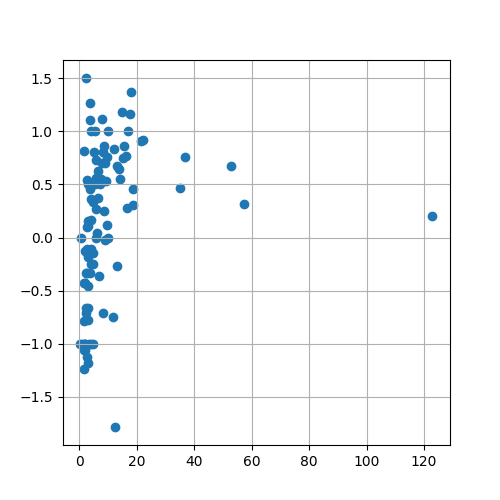

In [3]:
user_pd, user_pd_vals = NeMO_Data.filter_by_user(transect_num=15)
unique_users = user_pd.User_ID.unique()

avg_ratings = []
hours_played = []

for usr in unique_users:
    user_df = NeMO_Data.NeMO_df.loc[NeMO_Data.NeMO_df['User_ID'] == usr]
    print(usr, user_df['User_Email'].iloc[0])
    avg_ratings.append(np.mean(user_df.Rating))
    hours_played.append(np.mean(user_df.Hours_Played))

fig = plt.figure(figsize=(5,5)) 
plt.scatter(hours_played, avg_ratings)
plt.grid()
plt.show()


User: 054e4b47-92ba-11e9-892b-0239699f2190  # of Classifications:  47
Mean classification rating:  0.9523809523809523


<IPython.core.display.Javascript object>


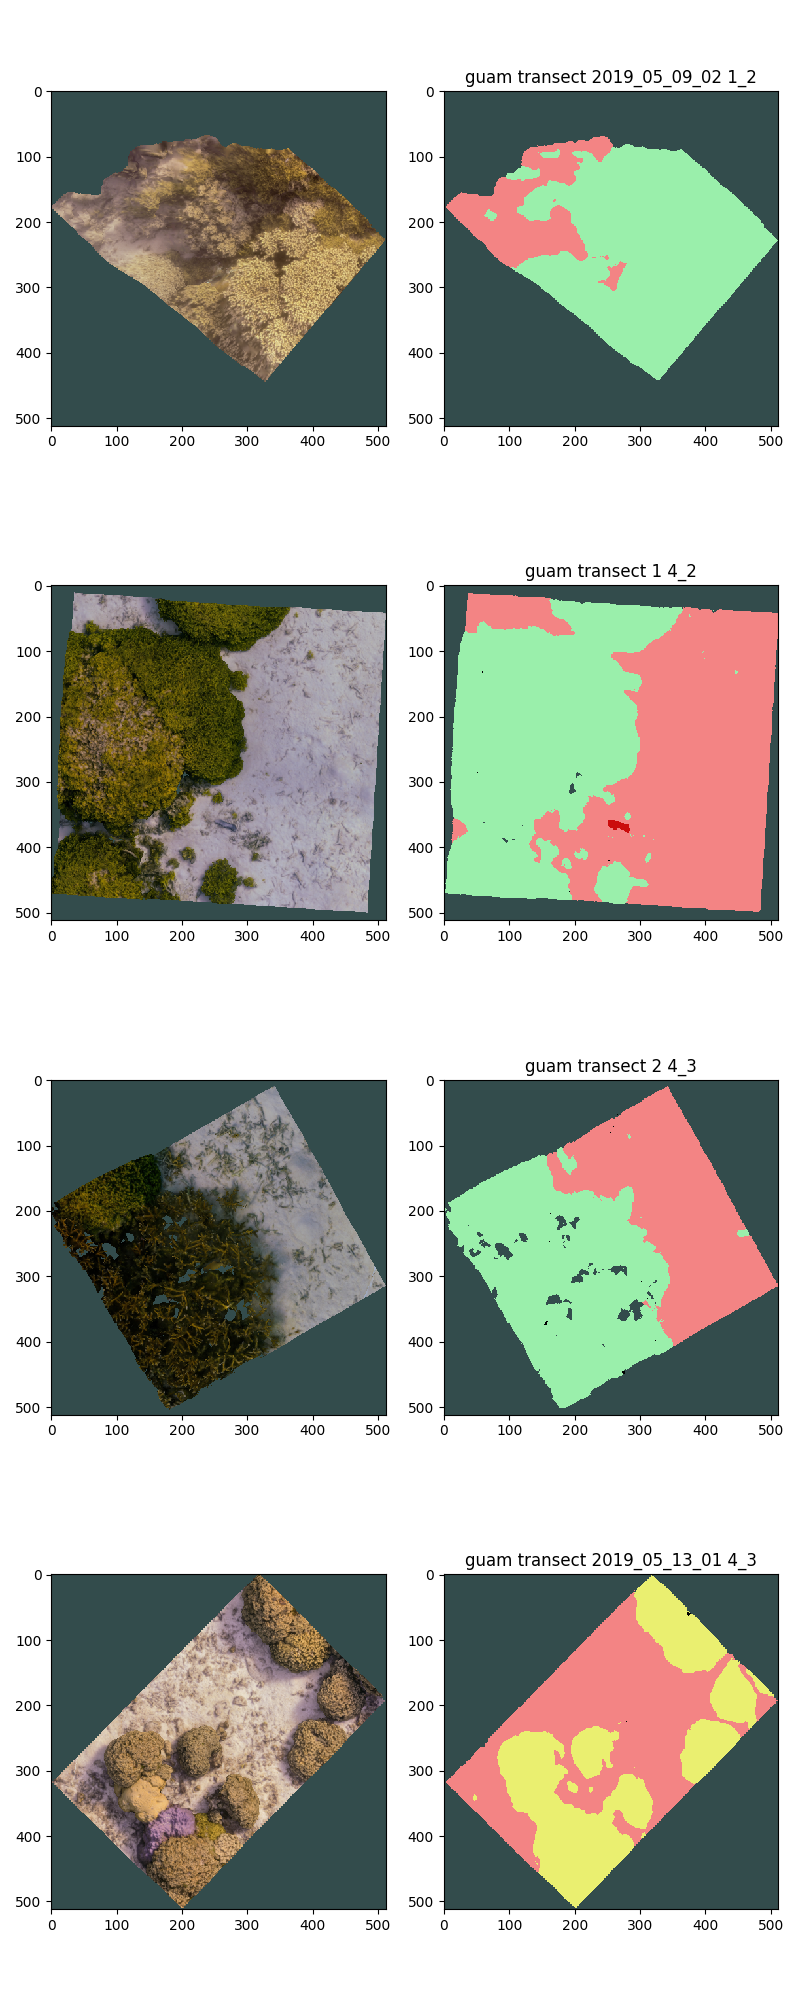

FAD12BDB-4290-43AE-ACE4-FC25810AE236 guam transect 2019_05_09_02 1_2
BB7B13EA-7883-4B64-B14D-E84253CEF944 guam transect 1 4_2
48C6E8C7-17C9-4A4F-831E-B437637468A0 guam transect 2 4_3
1B36F557-0C2B-43C6-BAE0-BA9E73C9C692 guam transect 2019_05_13_01 4_3
# of missing files: 0


In [6]:
usr_id = '054e4b47-92ba-11e9-892b-0239699f2190' # juan
# usr_id = '1d658e07-9228-11e9-892b-0239699f2190' # ved
# usr_id = '9a7d2c06-84d0-11ea-965c-02d709759666' # ranger-karen
# usr_id = 'fb67f1a3-9388-11e9-892b-0239699f2190' # Alan
# usr_id = '2b67cec7-8e7d-11ea-965c-02d709759666' #thomas oliver

sub_userdf = NeMO_Data.NeMO_df.loc[NeMO_Data.NeMO_df['User_ID'] == usr_id]
print("User:", usr_id, " # of Classifications: ", len(sub_userdf))
print("Mean classification rating: ", np.mean(sub_userdf['Rating']))

startpath = "/home/rechant/Documents/NeMO-Net/NeMO-NET/Images/AppData_May"
folders = [f for f in os.listdir(startpath)]

n_rows = 4
fig_count = 1
missing_files = 0
fig = plt.figure(figsize=(8,n_rows*5))

for n in range(n_rows):
    classification_fileID = sub_userdf.iloc[n]['Classification_fileID']
    print(classification_fileID, sub_userdf.iloc[n]['Transect_fileID'])
    CI = NeMO_Data.load_classification(classification_fileID)

    ax = plt.subplot(n_rows,2,fig_count)
    if CI.image.shape[2] == 8:
        CI_RGB = np.rollaxis(np.asarray([CI.image[:,:,4], CI.image[:,:,2], CI.image[:,:,1]], dtype=np.uint8), 0, 3)
    else:
        CI_RGB = CI.image
    ax.imshow(CI_RGB)
    fig_count += 1
    
    ax = plt.subplot(n_rows,2,fig_count)
    if CI.image.shape[2] == 8:
        ax.imshow(CI.classification.astype(int), interpolation='nearest', cmap=NeMO_Data.cmap_sat, norm=NeMO_Data.norm_sat)
    else:
        ax.imshow(CI.classification.astype(int), interpolation='nearest', cmap=NeMO_Data.cmap3D, norm=NeMO_Data.norm3D)
    ax.set_title(CI.transect_name)
    fig_count += 1 
plt.tight_layout()
plt.show()

print("# of missing files:", missing_files)

D5438AA8-BFE9-43C5-B8C3-602E172BE557 guam transect 1 2_3


<IPython.core.display.Javascript object>


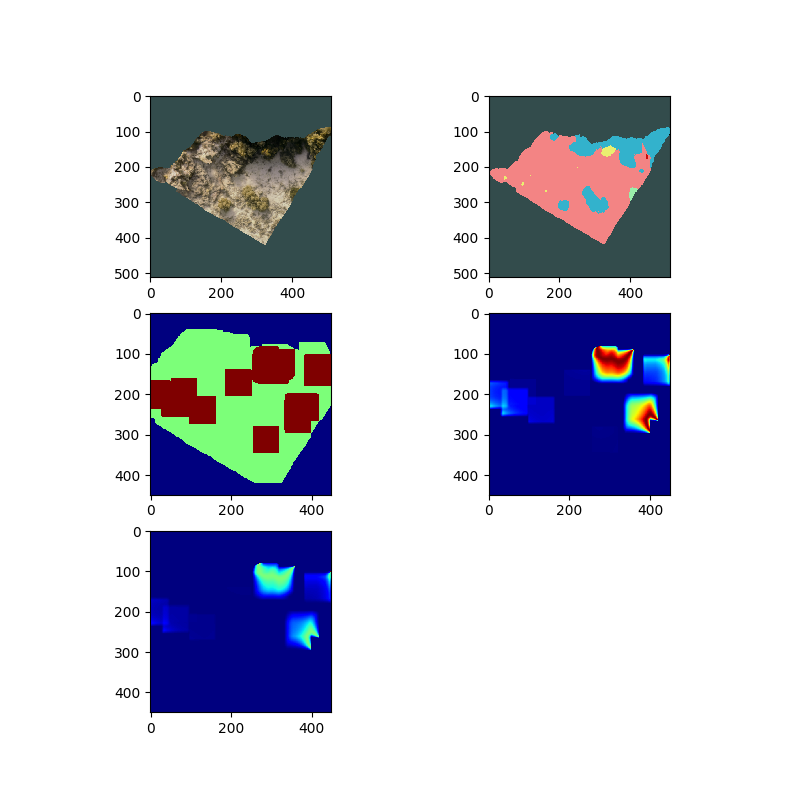

In [31]:
# Test sliding window on species richness vs evenness

window_size =64

i=10
classification_fileID = sub_userdf.iloc[i]['Classification_fileID']
CI = NeMO_Data.load_classification(classification_fileID)
print(classification_fileID, sub_userdf.iloc[n]['Transect_fileID'])

unq_classes, unq_num = np.unique(CI.classification, return_counts = True)

img_richness = np.zeros((CI.classification.shape[0]-window_size+1, CI.classification.shape[1]-window_size+1))
img_shannon = np.zeros((CI.classification.shape[0]-window_size+1, CI.classification.shape[1]-window_size+1))
img_simpson = np.zeros((CI.classification.shape[0]-window_size+1, CI.classification.shape[1]-window_size+1))
for j in range(CI.classification.shape[0] - window_size + 1):
    for i in range(CI.classification.shape[1] - window_size + 1):
        unq_classes, unq_num = np.unique(CI.classification[j:j+window_size, i:i+window_size], return_counts= True)
        unq_num = unq_num[unq_classes > 2]
        unq_classes = unq_classes[unq_classes > 2]
        img_richness[j,i] = len(unq_num)
        
        if len(unq_num) > 0:
            N = np.sum(unq_num)
            p = 1/N*unq_num
            img_shannon[j,i] = -np.sum(p*np.log(p))
            if N == 1:
                img_simpson[j,i] = 0
            else:
                img_simpson[j,i] = 1 - np.sum((unq_num*(unq_num-1))/(N*(N-1)))
        else:
            img_shannon[j,i] = 0
            img_simpson[j,i] = 0
        

fig = plt.figure(figsize=(8,8))
CI_RGB = CI.image
ax = plt.subplot(3,2,1)
ax.imshow(CI_RGB)

ax = plt.subplot(3,2,2)
ax.imshow(CI.classification.astype(int), interpolation='nearest', cmap=NeMO_Data.cmap3D, norm=NeMO_Data.norm3D)

ax = plt.subplot(3,2,3)
ax.imshow(img_richness, cmap='jet')

ax = plt.subplot(3,2,4)
ax.imshow(img_shannon, cmap='jet', interpolation='nearest')

ax = plt.subplot(3,2,5)
ax.imshow(img_simpson, cmap='jet', interpolation='nearest')
plt.show()


In [10]:
for i in range(22):
    print(np.uint8(i*255/CI.num_classes))
print(CI.num_classes)

0
11
23
34
46
57
69
81
92
104
115
127
139
150
162
173
185
197
208
220
231
243
22
